# Scaling and Normalization of Data 
- Scaling: This is the idea making a range for our data. Are are only going up to 10, or 100 on our graph? For each graph tick, is it going to go by 5, 10, 20? For example, you're looking at data about prices in USD and Yen. While 1 US dollar is 100 yen, the computer doesn't know that. This is an easy case as you can just convert the currencies into one. But how about 'height' vs 'weight'? It's not clear how many pounds equals how many inches. 
- Normalization: You're changing the shape of the distribution of your data. You're trying to make it a normal distribution, which would help you a lot in statistical analyses. Mainly when you're using a machine learning or statistics technique that assumes your data is normally distributed

## Min-Max Scaling
This transforms your data into a specific range, typically
between 0 and 1. This is a commonly used technique in data preprocessing. So the data will now be scaled between 0 and 1. This changes the data, but everything changes equally. So each data point's distance between the others is relatively unchanged.

### Distance Calculations
First let's understand distance calculations. In many algorithms, we need to measure the distance between data points. For example, the Euclidean distance formula denoted by $d=\sqrt{(x_2-x_1)^{2}+(y_2-y_1)^{2}}$, allows us to calculate the distance between 2 points in a 2D space. We do the same for data. For example if the age of userA = 10, and userB = 50, then the distance between them is 40 years. 

- **What are features?:** To clarify, 'features' are just attributes or columns in the dataset. For example, in a table of 'users' the features may include the 'Age', 'Income', 'Height', 'Membership Duration' of a user. Each feature can have different scales and distributions. So yeah when we talk about 'features', just know we're talking about just the columns of the dataset, whether they're original columns, or columns we've created.

#### Impact of Feature Ranges
1. **Large Ranges Can Skew Calculations:** If one feature (e.g. Income) ranges from 20,000 to 200,000, whilst another such as 'Age' ranges from 0 to 1, then you'll probably see that the average distance between income is a lot larger than the average distance between ages. As a result, the distances between two points for income can heavily influence our calculations and overshadow other features. You'll learn that algorithms don't understand context, so if one feature has a larger range than another, the algorithm will still treat them equally regardless of the real world significance. This can lead to biased result sin clustering or classification tasks, which you'd learn about later. So it's our job to pre-process and prepare the data.
2. **Min-Max Scaling Preserves Relative Distances:** When you apply min-max scaling, all features and data are converted into a common range such as [0, 1]. While the absolute values change, the relative distances between data points are preserved. The scaling is linear so if two points were 20 units apart before scaling, they'll still be proportionally spaced after range, but now they're just represented in the [0,1] range.

### Why do min-max scaling?
- **Equal Contribution:** By scaling the data's features (attributes) to the same range, we ensure each feature contributes equally to the distance calculations in algorithms that rely on them. This prevents features with really long ranges from disproportionately influencing the model. 
- **Improved Performance:** Can improve the performance of some algorithms by speeding up 'convergence' and leading to more accurate results. For example, scaling can help algorithms that rely on iterative optimization converge more quickly and avoid local minima.
- **Consistency:** Creates a consistent framework for handling different features. For example, if one feature ranges from 0 to 1000 and the other from 0 to 1, the first feature can overshadow the second. Scaling them to the same range removes this inconsistency.
- **More comprehensible:** For certain datasets, scaling can make the data more readable, especially when you want to visualize the features or compare them across different models or algorithms.

### When to use min-max scaling
1. **ML Algorithms:** Many algorithms, especially ones that rely on distance calculations, benefit from normalized (processed and whatnot) input features. These algorithms may perform bad if your features have significantly different ranges, as things can become more towards features with larger ranges.
2. **Neural Networks:** Features that are scaled in a consistent range such as [0,1] can lead to faster 'convergence' during training. This is because gradient descent, which is commonly used for training, can be more stable when input values are normalized. You'll learn more about this later.
3. **Visualization:** When plotting multiple features or datasets together, min-max scaling helps standardize the range of data. This can make it easier to compare distributions and trends.
4. **Feature Engineering:** If you're creating new features based on existing ones, min-max scaling can help maintain consistency in the range of your features. This ensures that new features don't dominate others due to their scale.

### When not to scale
Sometimes you'll have some reasons why not to scale your data.
1. **Tree-Based Algorithms:**These algorithms don't care about scaling since they don't operate eon distance calculations.
2. **Binary or Categorical Features:**Scaling is typically not needed for these types of data. Scaling won't change anything for binary features, and it doesn't make sense to scale categorical features since they represent distinct categories.
3. **When understanding is key:**For example, if you're presenting findings to stakeholders, they might find it easier to understand features in their original context (like age in years or income in dollars) rather than in a scaled format.


## Box-Cox Transformation (Normalizing)
The Box-Cox transformation is a family of power transformations that can stabilize variance and make the data more normally distributed. It is particularly useful for datasets that are positively skewed. This means the data is right skewed, so most of the data is towards the lower end, and few is towards the higher end. It can help meet the assumptions of various statistical methods and machine learning algorithms that assume normally distributed data.

### Why Use Box-Cox?
1. **Normality:** Many statistical techniques assume that the residuals (the difference between observed and predicted values) are normally distributed. So transforming the data to make it normal, allows for these techniques to be more valid.
2. **Homogeneity of Variance:** It helps stabilize variance across different levels of the data. This can make it easier to analyze.
3. **Model Performance:** In ML, models can perform better with normally distributed data, as they may be more sensitive to outliers and skewed distributions.

### How does Box-Cox work? 
The formula is defined as follows:
$
y' = 
\begin{cases} 
\frac{y^\lambda - 1}{\lambda} & \text{if } \lambda \neq 0 \\
\log(y) & \text{if } \lambda = 0 
\end{cases}
$

- y: The original data
- y': The transformed data
- $\lambda$: A parameter that the transformation optimizes. It determines the nature of the transformation. So if $\lambda=1$ it won't change the data. If $\lambda=0$, it applies a logarithmic transformation. If it's somewhere in between, then it applies a corresponding power transformation.

#### Transformation Process
1. **Choosing Lambda:** The Box-Cox method uses maximum likelihood estimation to find the optimal value of lambda that minimizes the distance between transformed data and a normal distribution.
2. **transforming the data:** Depending on the value of lambda, a given data point is transformed using the formula above. This will modify the shape of hte distribution, as skewed data can be 

### Concerns about changing data.
Yes, you are indeed changing the data when normalizing or transforming it, but this is done with the intent of enhancing the analytical process and achieving more reliable results. As long as you understand the implications of these changes and can interpret the results meaningfully, these transformations can be powerful tools in your data analysis toolkit.

# Credits:
1. [Scaling and normalization notebook](https://www.kaggle.com/code/alexisbcook/scaling-and-normalization)

In [1]:
# Modules for processing data
import pandas as pd
import numpy as np

# For Box-Cox Transformation: Allows us to normalize our data as best as possible
# You're probably not going to understand this yet, but just abstract it for now and trust that it works
from scipy import stats

# For scaling
from sklearn.preprocessing import minmax_scale

# modules for plotting
import seaborn as sns
import matplotlib.pyplot as plt

# Setting the randomness seed
np.random.seed(0)

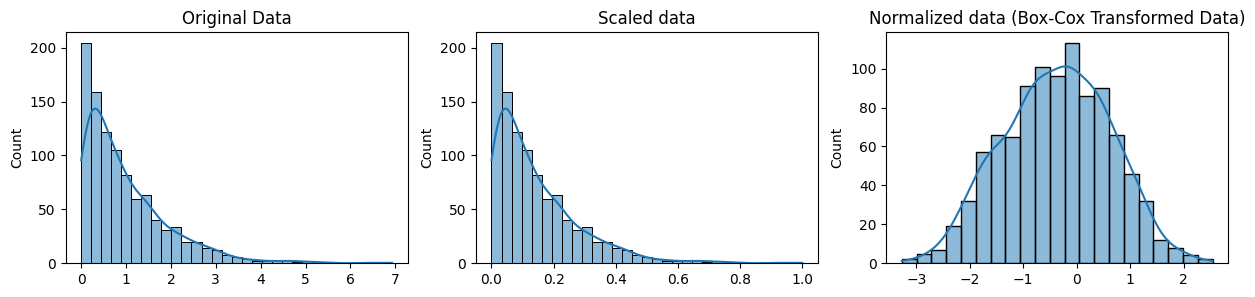

In [14]:

# Generate 1000 random data points from an exponential distribution
original_data = np.random.exponential(size=1000)

# Apply min-max scaling on the dataset
min_value = np.min(original_data)
max_value = np.max(original_data)
scaled_data = (original_data - min_value) / (max_value - min_value)

# Let's create a normalized version of our data; boxcox method returns the normalized data and the lambda value
normalized_data, lambda_value = stats.boxcox(original_data)  # Extract the transformed data



'''
Plot the original and scaled data to compare them. So here we're 
creating two histogram-like plots to compare them
'''
fig, ax = plt.subplots(1,3, figsize=(15, 3))

sns.histplot(original_data, ax=ax[0], kde=True, legend=False)
ax[0].set_title("Original Data")

sns.histplot(scaled_data, ax=ax[1], kde=True, legend=False)
ax[1].set_title("Scaled data")

sns.histplot(normalized_data, ax=ax[2], kde=True, legend=False)
ax[2].set_title("Normalized data (Box-Cox Transformed Data)")

plt.show()

